## Minimal example with TensorFlow 2.0
### Actual TensorFlow Intro
In this notebook we will recreate our machine learning algorithm using TF 2.1
### Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Data generation

In [4]:
observations = 1000

xs = np.random.uniform(-10,10,size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))
generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,(observations,1))
generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

### Solving with TensorFlow

In [5]:
training_data = np.load('TF_intro.npz')

In [10]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size)
])
model.compile(optimizer='sgd',loss='mean_squared_error')
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose = 2)

Train on 1000 samples
Epoch 1/100
1000/1000 - 0s - loss: 40.2147
Epoch 2/100
1000/1000 - 0s - loss: 4.4614
Epoch 3/100
1000/1000 - 0s - loss: 1.4864
Epoch 4/100
1000/1000 - 0s - loss: 0.6570
Epoch 5/100
1000/1000 - 0s - loss: 0.4285
Epoch 6/100
1000/1000 - 0s - loss: 0.3706
Epoch 7/100
1000/1000 - 0s - loss: 0.3480
Epoch 8/100
1000/1000 - 0s - loss: 0.3472
Epoch 9/100
1000/1000 - 0s - loss: 0.3429
Epoch 10/100
1000/1000 - 0s - loss: 0.3495
Epoch 11/100
1000/1000 - 0s - loss: 0.3465
Epoch 12/100
1000/1000 - 0s - loss: 0.3508
Epoch 13/100
1000/1000 - 0s - loss: 0.3501
Epoch 14/100
1000/1000 - 0s - loss: 0.3426
Epoch 15/100
1000/1000 - 0s - loss: 0.3490
Epoch 16/100
1000/1000 - 0s - loss: 0.3432
Epoch 17/100
1000/1000 - 0s - loss: 0.3449
Epoch 18/100
1000/1000 - 0s - loss: 0.3425
Epoch 19/100
1000/1000 - 0s - loss: 0.3462
Epoch 20/100
1000/1000 - 0s - loss: 0.3478
Epoch 21/100
1000/1000 - 0s - loss: 0.3468
Epoch 22/100
1000/1000 - 0s - loss: 0.3400
Epoch 23/100
1000/1000 - 0s - loss: 0.34

### Extract the weights and bias

In [11]:
model.layers[0].get_weights()

[array([[ 1.9962759],
        [-2.9831445]], dtype=float32),
 array([4.992849], dtype=float32)]

In [12]:
model.layers[0].get_weights()[0]

array([[ 1.9962759],
       [-2.9831445]], dtype=float32)

In [13]:
model.layers[0].get_weights()[1]

array([4.992849], dtype=float32)

### Extract the outputs (make predictions)

In [51]:
predict = model.predict_on_batch(training_data['inputs'])
predict

<tf.Tensor: shape=(1000, 1), dtype=float32, numpy=
array([[  1.834187  ],
       [  4.688623  ],
       [ 10.913963  ],
       [ 10.258097  ],
       [ 11.766514  ],
       [-20.457457  ],
       [-25.68283   ],
       [ 41.462723  ],
       [ 34.304226  ],
       [ 47.88657   ],
       [ 35.402687  ],
       [-27.365282  ],
       [ 17.163908  ],
       [-20.016584  ],
       [ 27.664167  ],
       [ 14.287004  ],
       [ -4.106732  ],
       [  7.921328  ],
       [  5.0449276 ],
       [  6.8213835 ],
       [ 29.266447  ],
       [  5.7403617 ],
       [  5.020107  ],
       [  6.1602035 ],
       [ 21.432543  ],
       [ 33.985245  ],
       [ 43.385597  ],
       [ -7.348745  ],
       [ 13.037029  ],
       [-10.542805  ],
       [ 23.998823  ],
       [ -7.4217534 ],
       [ 33.01092   ],
       [ 25.66765   ],
       [-11.272419  ],
       [-12.396502  ],
       [ 28.53744   ],
       [ 42.396103  ],
       [ -4.420339  ],
       [-12.047415  ],
       [ 36.736748  ],
      

In [52]:
targets = training_data['targets']
targets

array([[ 1.32817613e+00],
       [ 5.61467422e+00],
       [ 1.03159362e+01],
       [ 1.02784375e+01],
       [ 1.08623664e+01],
       [-2.00728768e+01],
       [-2.59936733e+01],
       [ 4.12531278e+01],
       [ 3.37327638e+01],
       [ 4.78463936e+01],
       [ 3.51666183e+01],
       [-2.65738895e+01],
       [ 1.68078549e+01],
       [-2.03958869e+01],
       [ 2.77634889e+01],
       [ 1.40015689e+01],
       [-4.87772084e+00],
       [ 7.04226441e+00],
       [ 4.11172850e+00],
       [ 7.40452877e+00],
       [ 2.95975748e+01],
       [ 6.76413105e+00],
       [ 4.11273913e+00],
       [ 6.52780726e+00],
       [ 2.11206993e+01],
       [ 3.33601354e+01],
       [ 4.36800891e+01],
       [-7.94283549e+00],
       [ 1.31963558e+01],
       [-1.05670017e+01],
       [ 2.43877851e+01],
       [-7.32199396e+00],
       [ 3.22540015e+01],
       [ 2.67346465e+01],
       [-1.20014660e+01],
       [-1.30519238e+01],
       [ 2.85701510e+01],
       [ 4.18149080e+01],
       [-4.2

### Plotting the data

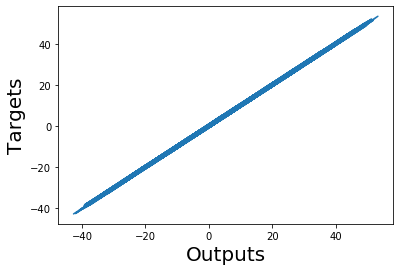

In [53]:
plt.plot(np.squeeze(predict), np.squeeze(targets))
plt.xlabel('Outputs', fontsize=20)
plt.ylabel('Targets', fontsize=20)
plt.show()